<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Types-of-Features/EDA_Functions_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA Part 1

In [92]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# This is the Ames data after the week 5 cleaning steps (still has null values)
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/Prepped-ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice,Month,Year,Total Half Baths,Total Full Baths
0,907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,...,TA,TA,Y,MnPrv,03-2006,119900.0,3,2006,0.0,1.0
1,527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,...,TA,TA,Y,NaN,03-2006,320000.0,3,2006,1.0,3.0
2,534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,...,TA,TA,Y,NaN,04-2007,151500.0,4,2007,0.0,1.0
3,528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,...,TA,TA,Y,NaN,06-2008,385000.0,6,2008,0.0,3.0
4,533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,TA,TA,Y,NaN,02-2007,193800.0,2,2007,0.0,3.0


In [94]:
#Setting PID as the index
df = df.set_index("PID")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

## Make a Temporary Copy of the Dataframe for EDA

In [95]:
# Copy of dataframe just for visualization and EDA
temp_df = df.copy()

## Fill in missing values with a placeholder

In [96]:
# Let's start with Alley
x = "Alley"
placeholder = "Missing"
# In our temporatory df, we will fill in the missing values in the Alley column with the placeholder, MISSING
temp_df[x] = temp_df[x].fillna(placeholder)

## Making a Countplot

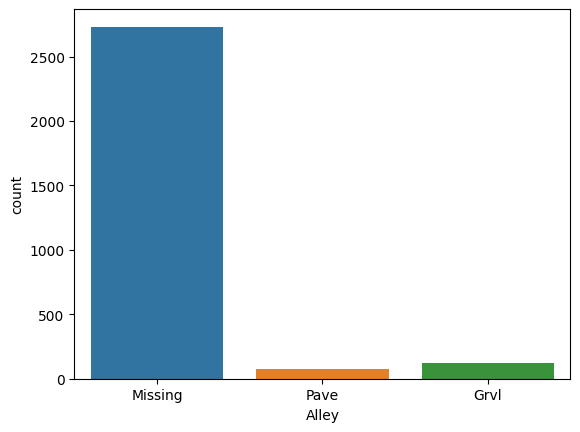

In [97]:
# Plotting a count plot 
sns.countplot(temp_df, x=x);

## Customize the Plot

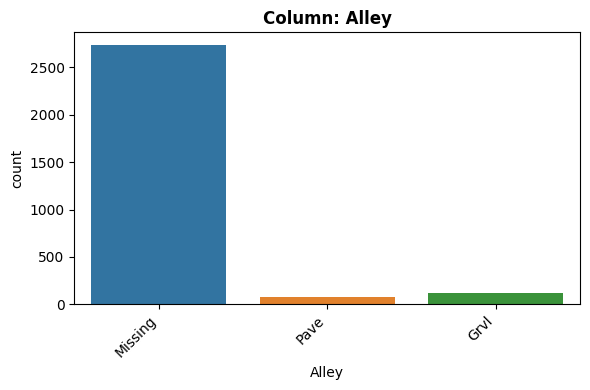

In [98]:
# Create figure with desired figsize
fig, ax = plt.subplots(figsize=(6,4))
# Plotting a count plot 
sns.countplot(temp_df, x=x, ax=ax)
# Rotate Tick Labels for long names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Add a title with the feature name included
ax.set_title(f"Column: {x}", fontweight="bold")
fig.tight_layout();

In [99]:
def explore_categorical(df, x, fillna=True, placeholder = "Missing"):
    #Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # Fill in missing values with placeholder
    temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=(6,4))
    # Plotting a count plot 
    sns.countplot(temp_df, x=x, ax=ax)
    # Rotate Tick Labels for long names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"Column: {x}");
    fig.tight_layout()

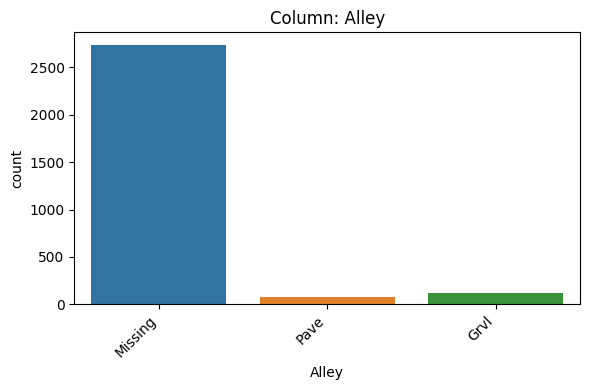

In [100]:
# Test our function on Alley
explore_categorical(df, "Alley");

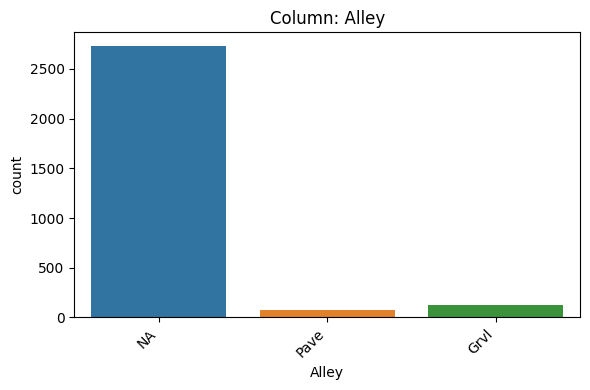

In [101]:
#Trying a different placeholder than default of "Missing"
explore_categorical(df, "Alley", placeholder="NA")

## Include Keyword Argument for fillna



In [102]:
def explore_categorical(df, x, fillna=True, placeholder="Missing"):
    # Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # fill NA with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=(6,4))
        # Plotting a count plot 
        sns.countplot(temp_df, x, ax=ax)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}");
        fig.tight_layout()

In [103]:
#Using custom function to 
explore_categorical(df, "Alley", fillna=False)

## Include Keyword Argument for figsize and return fig, ax

In [104]:
def explore_categorical(df, x, fillna=True, placeholder="Missing",
                        figsize=(6,4)):
    # Make a copy of the dataframe and fillna
    df = df.copy() 
    # fill NA with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)                  
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=(6,4))
        # Plotting a count plot 
        sns.countplot(temp_df, x=x)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}", fontweight="bold")
        fig.tight_layout()
        return fig, ax

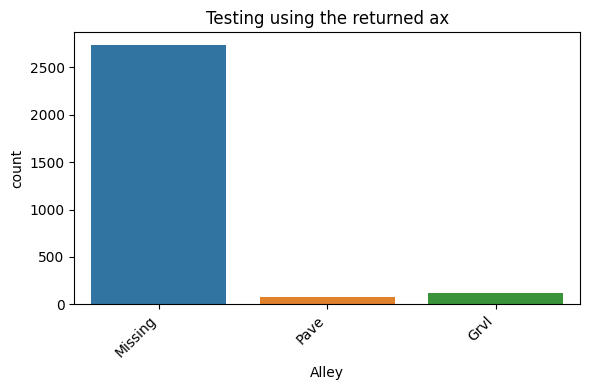

In [105]:
fig, ax = explore_categorical(df, "Alley", figsize=(5,3))
ax.set_title("Testing using the returned ax");

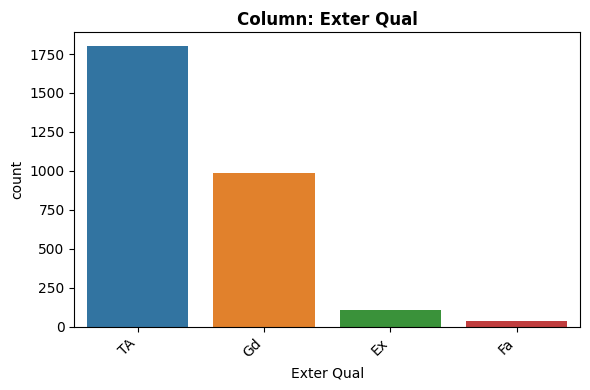

In [106]:
# Test our function on Exter Qual
explore_categorical(df, x="Exter Qual");

## Include Keyword Argument for Order


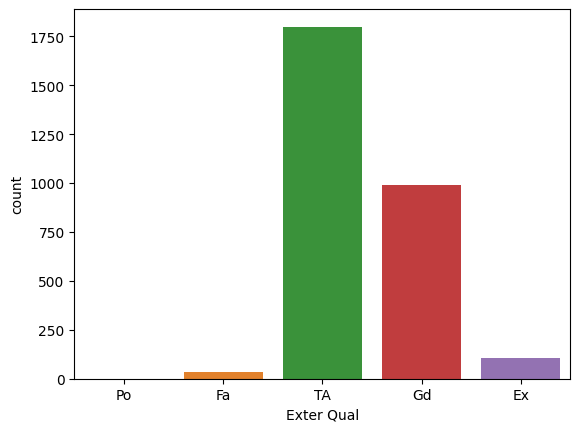

In [107]:
# Saving a list of the possible categories in order 
qual_order = ["Po", "Fa", "TA", "Gd", "Ex"]
# Using the order argument in our countplot
sns.countplot(df, x="Exter Qual", order=qual_order);

You'll see "Po" is still included even though it has a value of 0.

In [108]:
#Check the value of "Po"
df['Exter Qual'].value_counts(dropna=False)

TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64

In [109]:
def explore_categorical(df, x, fillna=True, placeholder="Missing",
                        figsize=(6,4), order=None):
  # Make a copy of the dataframe and fillna 
    df_temp = df.copy()
  # fillna with placeholder
    if fillna == True:
        df_temp[x] = df_temp[x].fillna(placeholder)
  # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
    sns.countplot(df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  # Add a title with the feature name included
    ax.set_title(f"Column: {x}", fontweight="bold")
    fig.tight_layout()
    return fig, ax

Testing the function without and with order.

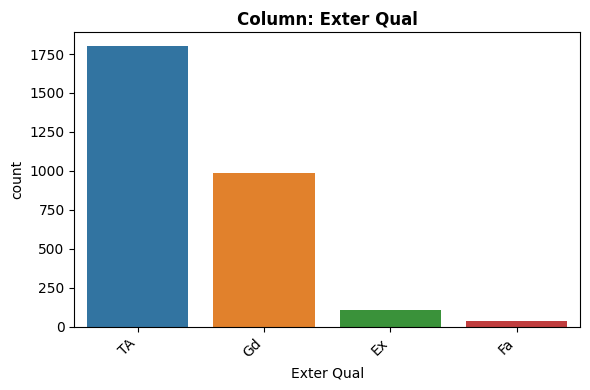

In [110]:
explore_categorical(df, "Exter Qual");

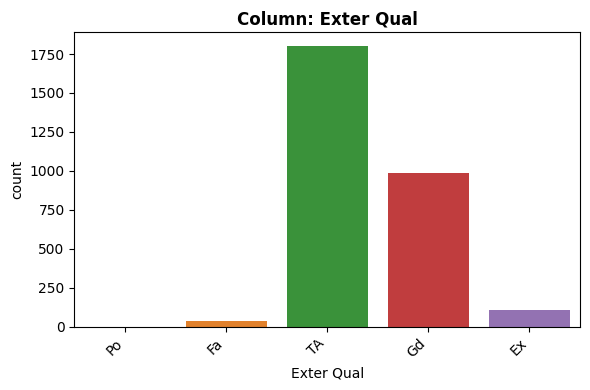

In [111]:
# Checking Exter Qual with order
qual_order = ['Po','Fa','TA','Gd','Ex']
# Use the order argument in our function
explore_categorical(df, "Exter Qual", order=qual_order);

## 1) How many missing values are present (both the count and percentage)?

In [112]:
# Let's practice on Alley
x = "Alley"
# Before filling in the NA values with a placeholder, let's get the missing value count and percentage
temp_df = df.copy()
# Save null values counts 
null_count = temp_df[x].isna().sum()
# Calculate the percentage of null values
null_percent = null_count/len(temp_df) * 100
# Print the null value info with an f-statement
print(f"- NaNs Found: {null_count} ({round(null_percent,2)})%")

- NaNs Found: 2732 (93.24)%


## 2) How many different classes are there?

The number of unique values in each feature is known as the feature's cardinality.

In [113]:
# Print cardinality info
nunique = temp_df[x].nunique()
print(f"— Unique Values: {nunique}")

— Unique Values: 2


## 3) What is the most common value and how often does it occur?

We will start by obtaining the value counts of the feature. We will allow null values to be included by using dropna = False.

In [114]:
val_counts = temp_df[x].value_counts(dropna=False)
val_counts

NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [115]:
# Check the data type of this output to see what method we can use to get the most common value
type(val_counts)

pandas.core.series.Series

In [116]:
# Isolate the name of the most common value by using the index (key)
most_common_val = val_counts.index[0]
most_common_val

nan

In [117]:
# Isolate the number of entries having the most common value by using .values
freq  = val_counts.values[0]
freq

2732

In [118]:
perc_most_common = freq / len(temp_df) * 100
perc_most_common

93.24232081911262

In [119]:
# Include a print statement and round the percent
print(f"Most common value: {most_common_val} occurs {freq} times ({round(perc_most_common, 2)}%).")

Most common value: nan occurs 2732 times (93.24%).


Combining all cells above into one cell

In [120]:
# First find value counts of feature
val_counts = temp_df[x].value_counts(dropna=False)
# Define the most common value
most_common_val = val_counts.index[0]
# Define the frequency of the most common value
freq = val_counts.values[0]
# Calculate the percentage of the most common value
perc_most_common = freq / len(temp_df) * 100
# Print the results
print(f"Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%).")

Most common value: 'nan' occurs 2732 times (93.24%).


## 4. Is the feature quasi-constant or constant?
If 100% of the values are identical, we say the feature is constant. If over 98% of the values are identical, we say the feature is quasi-constant.

In [121]:
# print message if quasi-constant or constant (most common val more than 98% of data)
if perc_most_common > 98:
    print(f"\n- [!]WARNING: {x} is a constant or quasi-constant feature and should be dropped.")
else:
    print("- Not constant or quasi-constant.")    

- Not constant or quasi-constant.


In [122]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
 
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

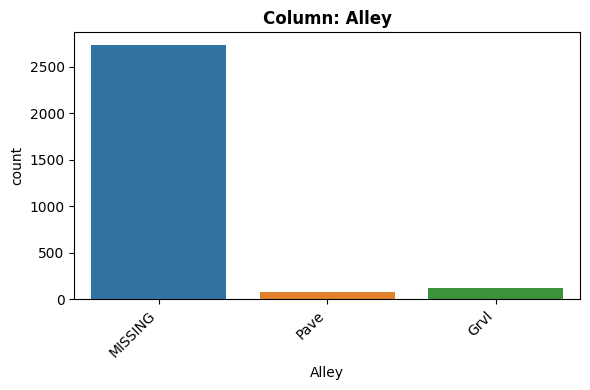

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [123]:
explore_categorical(df, "Alley");

# EDA Functions Part 2


In [124]:
# Declaring required variables
x = "Exter Qual"
y = "SalePrice"

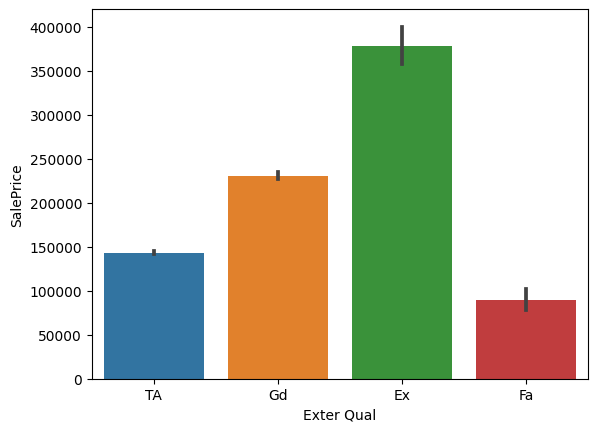

In [125]:
# Default Barplot 
sns.barplot(df, x=x, y=y);

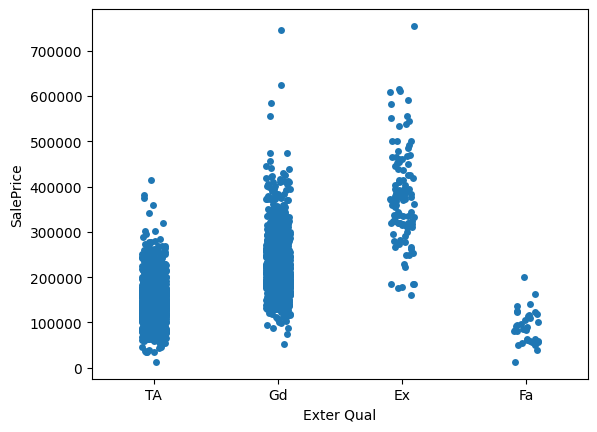

In [126]:
# Default striplot only
sns.stripplot(df, x=x, y=y);

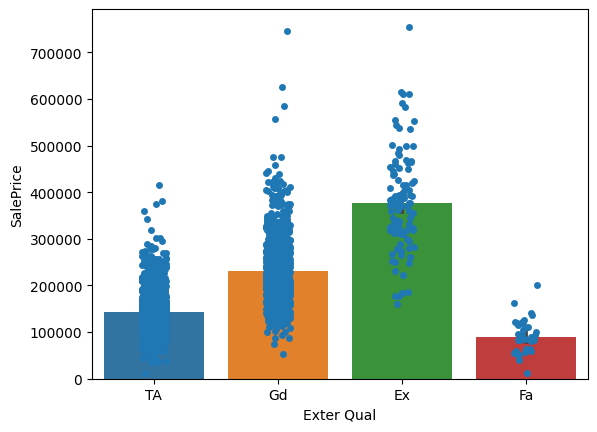

In [127]:
# Striplot and barplot in one plot
# Default Barplot
sns.barplot(df, x=x, y=y);
# Default stripplot 
sns.stripplot(df, x=x, y=y);

## Change color of scatterplot

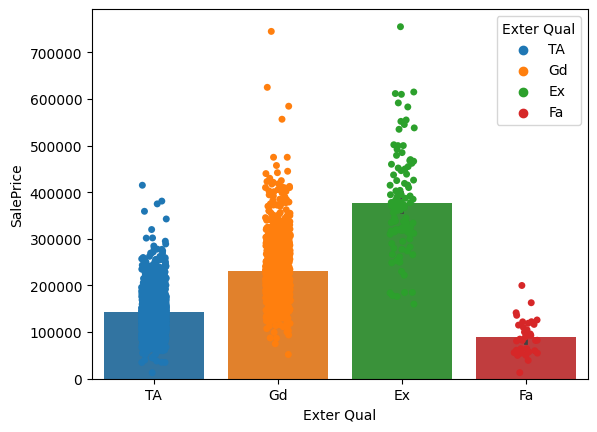

In [128]:
# Let's match the colors of the stripplot and the bar plot
# Striplot and barplot in one plot
# Default Barplot
sns.barplot(df, x=x, y=y);
# Include the hue argument for the stripplot
sns.stripplot(df, x=x, y=y, hue=x);

### Plots with Null in Features

In [129]:
# Let's try this code on a feature that has null values
# Declaring required variables
x="Alley"
y="SalePrice"

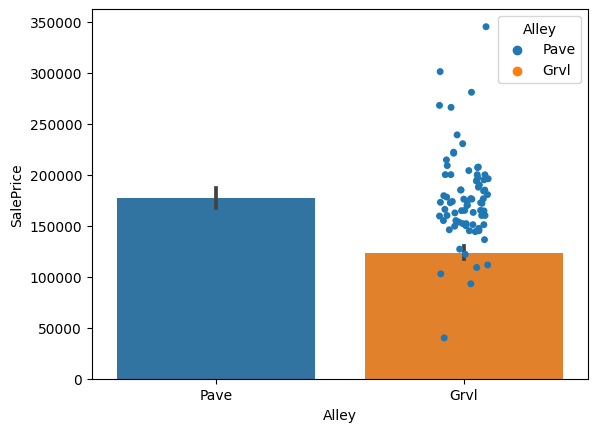

In [130]:
# Stripplot and barplot in one plot
# Default Barplot
sns.barplot(df, x=x, y=y)
# Include hue argument for the stripplot
sns.stripplot(df, x=x, y=y, hue=x);

Our plots do not align correctly when a feature has null values.

## Method 1) Fill in Missing Values with a Placeholder



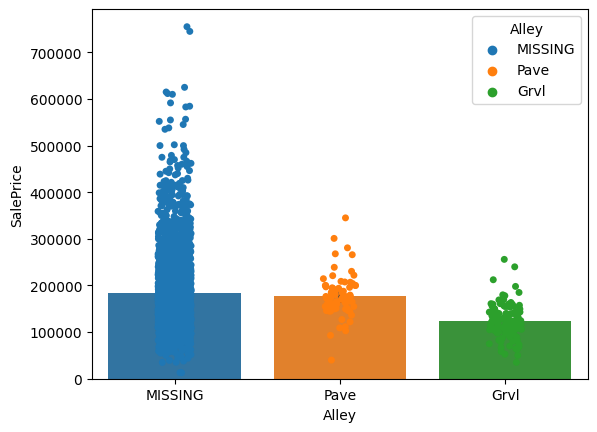

In [131]:
# Make a copy of the dataframe and fillna 
temp_df = df.copy()
# Fill missing values with a placeholder
# Define the placeholder
placeholder = 'MISSING'
# fillna with placeholder
temp_df[x] = temp_df[x].fillna(placeholder)
# Striplot and barplot in one plot with placeholder
# Default Barplot
sns.barplot(temp_df, x=x, y=y)
# Include hue argument with the stripplot
sns.stripplot(temp_df, x=x, y=y, hue = x);

## Method 2) Dropping Null Values



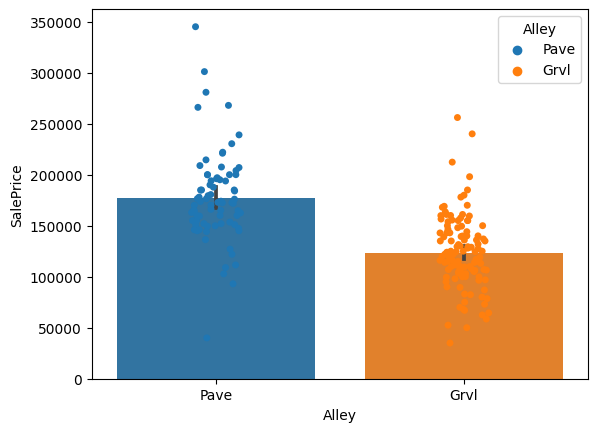

In [132]:
# Make a copy of df to demo dropping null values
demo_df = df.copy()
# Drop nulls before plotting, using subset=[x] for Alley
demo_df = demo_df.dropna(subset=[x])
# Striplot and barplot in one plot with placeholder
# Default Barplot
sns.barplot(demo_df, x=x, y=y)
# Include hue argument with the stripplot
sns.stripplot(demo_df, x=x, y=y, hue=x);

### Customize Barplot and Stripplot
We will return to the "Exter Qual" feature to demonstrate the customizations since its classes have an inherent order.

In [133]:
x="Exter Qual"
y="SalePrice"

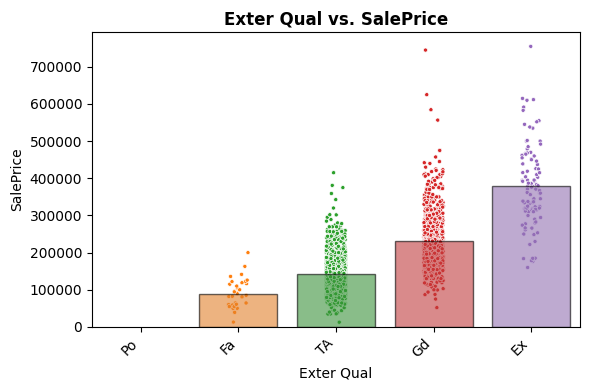

In [134]:
# Customize the plots
fig, ax = plt.subplots(figsize=(6,4))
# Striplot
sns.stripplot(data=df, x=x, y=y, hue=x, ax=ax, 
              order=qual_order, hue_order=qual_order,
              legend=False, edgecolor='white',
              linewidth = 0.5, size=3, zorder=0);
# Barplot 
sns.barplot(data=df, x=x, y=y, ax=ax, alpha=0.6, order=qual_order,
            linewidth=1, edgecolor='black', errorbar=None); 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title(f"{x} vs. {y}", fontweight="bold");
fig.tight_layout()

Write the Function

In [135]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

Test the Function



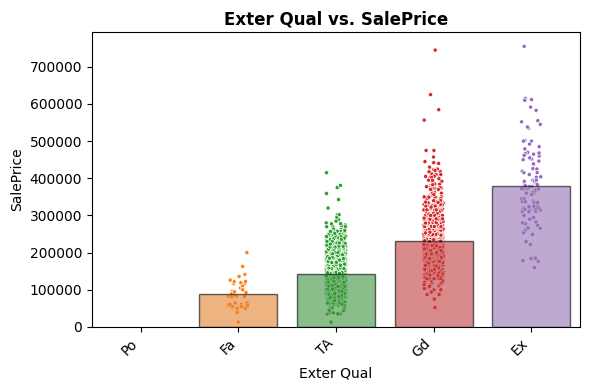

In [136]:
# Test with an order argument
fig, ax = plot_categorical_vs_target(df, x='Exter Qual', fillna=False,
                                  order=qual_order)

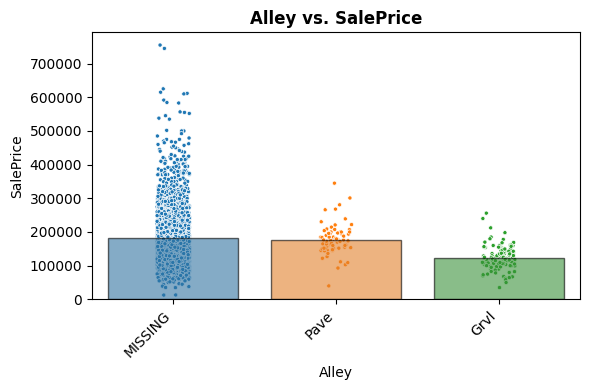

In [137]:
# Test the function will a feature that has missing values
# Our function will put in the missing values
fig, ax = plot_categorical_vs_target(df, x="Alley")

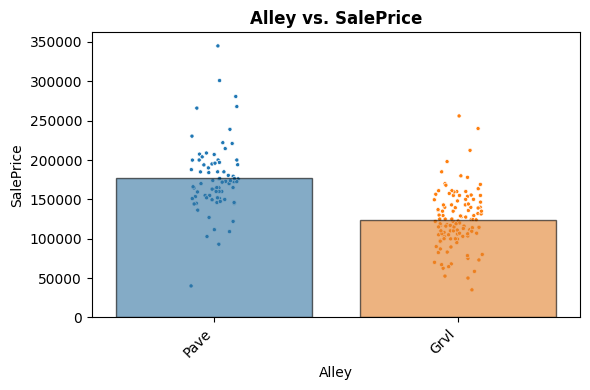

In [138]:
# Test the function without filling in null vlaues
fig, ax = plot_categorical_vs_target(df, x="Alley", fillna=False)

# EDA Functions Part 3


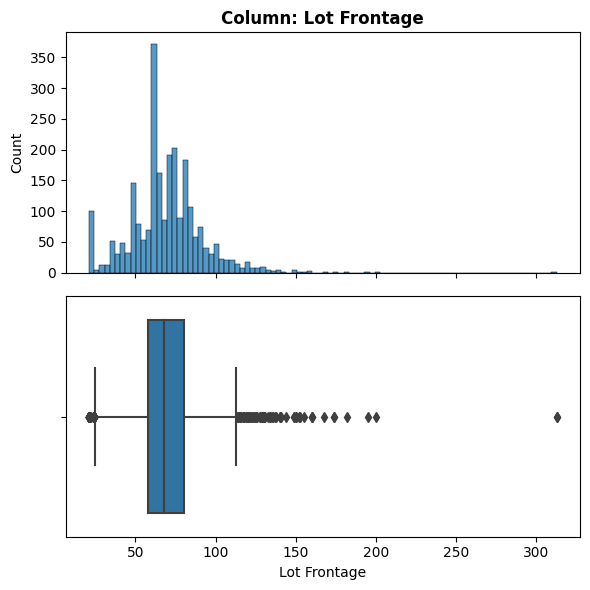

In [139]:
# Specify the x column
x = "Lot Frontage"
# Creating the figure 
fig, axes = plt.subplots(nrows=2, figsize=(6,6), sharex=True)
# Histogram on Top
sns.histplot(df, x="Lot Frontage", ax=axes[0])
# Boxplot on Bottom
sns.boxplot(df, x=x, ax=axes[1])
#Set title
axes[0].set_title(f"Column: {x}", fontweight="bold");
fig.tight_layout()

## Subplots with different sizes


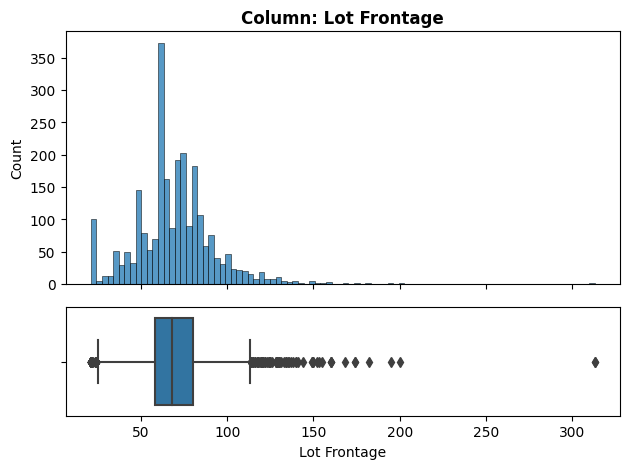

In [140]:
# Using a dictionary to state subplot heights
#70% of the height space for the 1st plot
#30 of height space for the 2nd plt
gridspec = {"height_ratios":[0.7, 0.3]}
fig, axes = plt.subplots(nrows=2, gridspec_kw=gridspec, sharex=True)
# Histogram on Top
sns.histplot(df, x="Lot Frontage", ax=axes[0])
# Boxplot on Bottom
sns.boxplot(df, x="Lot Frontage", ax=axes[1])
#Set title
axes[0].set_title(f"Column: {x}", fontweight="bold")
fig.tight_layout()

#### Test print statements

In [141]:
# Print message with info on the count and % of null values
null_count = df[x].isna().sum()
null_perc = null_count/len(df) * 100
print(f"- NaNs Found: {null_count} ({round(null_perc, 2)}%)")

- NaNs Found: 490 (16.72%)


### Define Function

In [142]:
def explore_numeric(df, x, figsize=(6,5)):
    # Making our figure with gridspec for subplots
    gridspec = {"height_ratios":[0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)
    # Histogram on Top
    sns.histplot(df, x=x, ax=axes[0])
    # Boxplot on Bottom
    sns.boxplot(df, x=x, ax=axes[1])
    ## Adding a title
    axes[0].set_title(f"Column: {x}", fontweight="bold")
    ## Adjusting subplots to best fill Figure
    fig.tight_layout()

    # Ensure plot is shown before message
    plt.show()
    ## Print message with info on the count and % of null values
    null_count = df[x].isna().sum()
    null_perc = null_count/len(df) * 100
    print(f"- NaNs Found: {null_count} ({round(null_perc, 2)}%)")

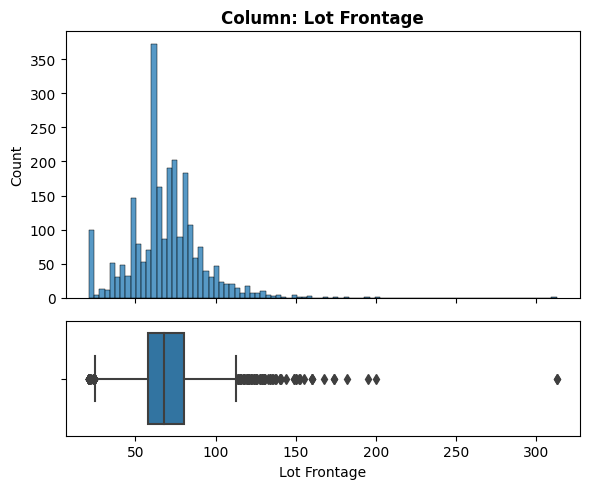

- NaNs Found: 490 (16.72%)


In [143]:
# Test the function
explore_numeric(df, "Lot Frontage")

##Constructing plot_numeric_vs_target


In [144]:
# Declaring required variables
x="Lot Frontage"
y="SalePrice"
# calculating correlation
corr=df[[x,y]].corr().round(2)
corr

,Lot Frontage,SalePrice
Lot Frontage,1.00,0.36
SalePrice,0.36,1.00


In [145]:
# To get the value for x vs y correlation:
r = corr.loc[x,y]
r

0.36

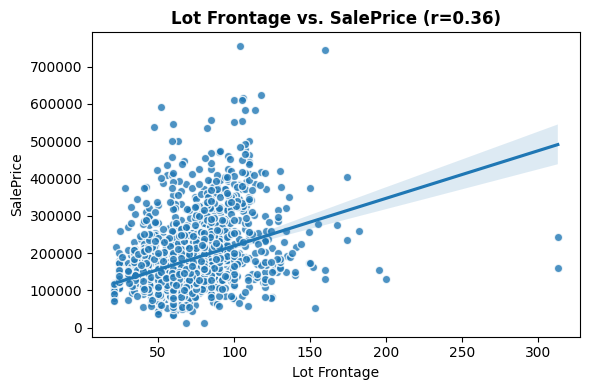

In [146]:
# Plot the data
fig, ax = plt.subplots(figsize=(6,4))
scatter_kws = {"ec":"white", "lw":1, "alpha":0.8}
sns.regplot(df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
# Add the title with the correlation
ax.set_title(f"{x} vs. {y} (r={r})", fontweight="bold")
fig.tight_layout()

In [147]:
def plot_numeric_vs_target(df, x, y="SalePrice", figsize=(6,4)):
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    fig, ax = plt.subplots(figsize=figsize)
    scatter_kws = {"ec":"white", "lw":1, "alpha":.8}
    sns.regplot(df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r={r})", fontweight="bold")
    # Make sure the plot is shown before the print statement
    plt.show()
    #Returning fig and ax so you can use outside of this function
    return fig, ax

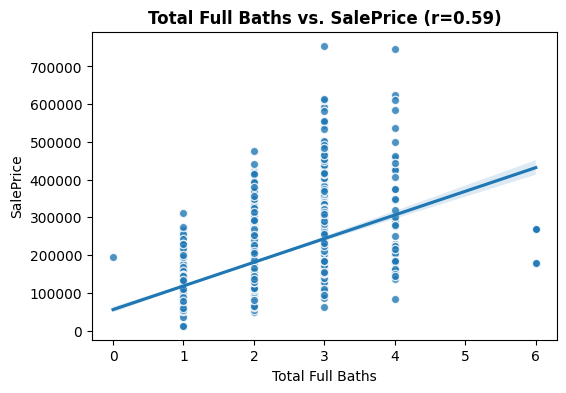

In [148]:
# Test the function with Total Full Baths
fig, ax = plot_numeric_vs_target(df, x="Total Full Baths")

## Inspecting Features


### Demonstration of Feature Inspection Workflow

### Inspecting Utilities

#### 1) Univariate Viz

In [149]:
# Confirming the dtype to select correct EDA function
feature = "Utilities"
df[feature].dtype

dtype('O')

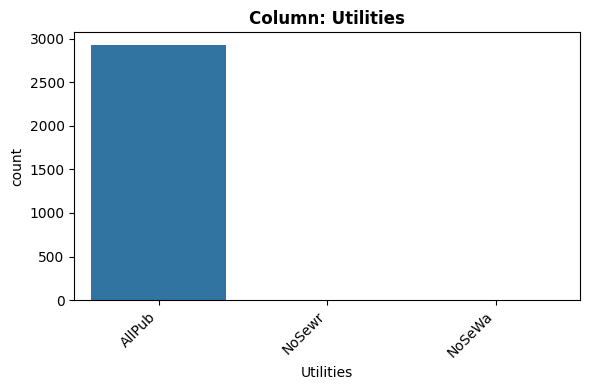

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'AllPub' occurs 2927 times (99.9%)

- [!] Warning: 'Utilities' is a constant or quasi-constant feature and should be dropped.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Utilities'}, xlabel='Utilities', ylabel='count'>)

In [150]:
# Calling our custom EDA function
explore_categorical(df, feature)

#### 3) Multivariate Viz





(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Utilities vs. SalePrice'}, xlabel='Utilities', ylabel='SalePrice'>)

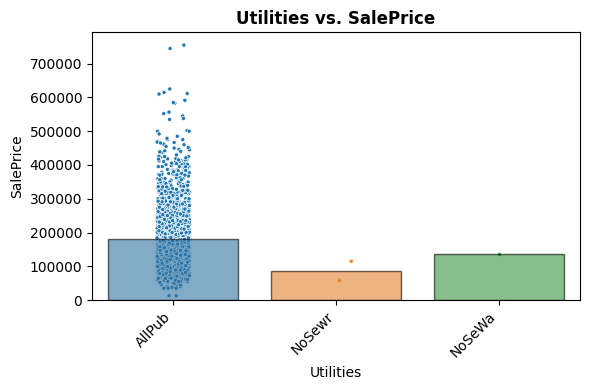

In [151]:
# Calling our custom EDA function 
plot_categorical_vs_target(df, feature)

### Inspecting: Garage Qual

#### 1) Univariate Viz

In [152]:
# Confirming the dtype to select correct EDA function
feature = "Garage Qual"
df[feature].dtype

dtype('O')

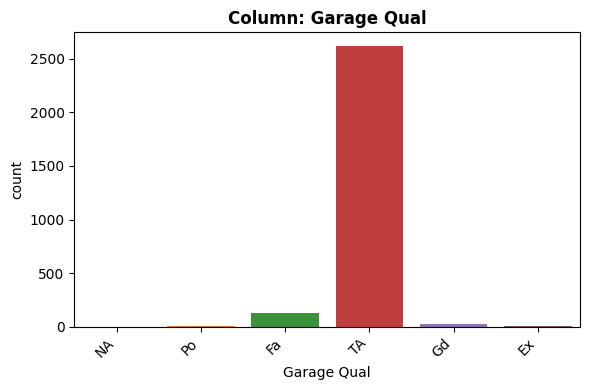

- NaN's Found: 159 (5.43%)
- Unique Values: 6
- Most common value: 'TA' occurs 2615 times (89.25%)
- Not constant or quasi-constant.


In [153]:
# Define the order
garage_qual_order = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
# Using explore_categorical based on dtype 
explore_categorical(df, feature, order=garage_qual_order);

#### 3) Multivariate Viz



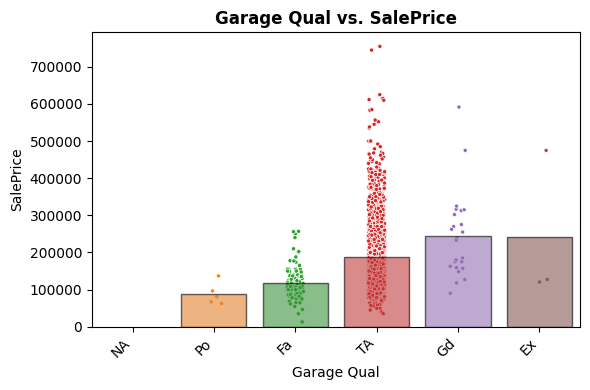

In [154]:
# Call custom function
plot_categorical_vs_target(df, feature, order=garage_qual_order);

### Inspecting: Lot Frontage


#### 1) Univariate Viz

In [155]:
# Confirming the dtype to select correct EDA function
feature = "Lot Frontage"
df[feature].dtype

dtype('float64')

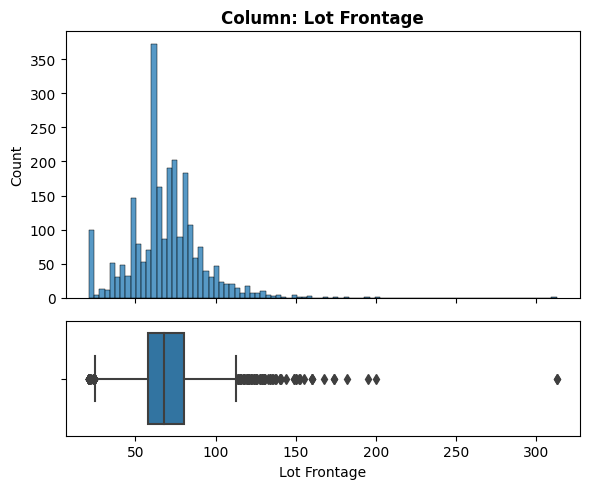

- NaNs Found: 490 (16.72%)


In [156]:
# Calling custom EDA function for numeric
explore_numeric(df, feature);

In [157]:
# Checking for lowest value for lot frontage
df["Lot Frontage"].min()

21.0

Since `Lot Frontage` and `Lot Area` are related we can look into each column to see if `Lot Area` has been calculated.

In [158]:
#Saving related columns
lot_columns = ["Lot Frontage", "Lot Area"]

In [159]:
# Save filter of null lot frontages
filter_null_lot_frontage = df["Lot Frontage"].isna()
#Add up all the na's from Lot Frontage
filter_null_lot_frontage.sum()

490

In [160]:
# Filter the lot columsn for rows missing lot frontage
#.loc uses (row, column)
check_lots = df.loc[filter_null_lot_frontage, lot_columns]
check_lots

,Lot Frontage,Lot Area
PID,,
534275170,NaN,12772
534127170,NaN,9156
528292080,NaN,12104
534278150,NaN,14357
528280100,NaN,11214
...,...,...
914476380,NaN,9947
906230020,NaN,7939
905300020,NaN,10200


In [161]:
# Obtain null value counts for both lot columns
#Essentially we are just checking the values from the stats right above this cellcheck_lots.isna().sum()

#### 3) Multivariate Viz



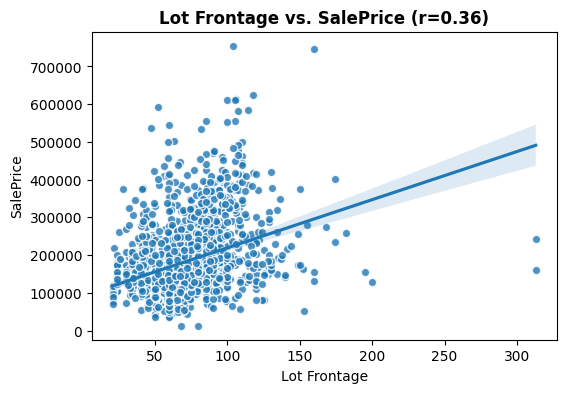

In [162]:
# Call custom function
plot_numeric_vs_target(df, feature);

### Inspecting: Neighborhood


In [163]:
feature = "Neighborhood"
df[feature].dtype

dtype('O')

#### 1) Univariate Viz



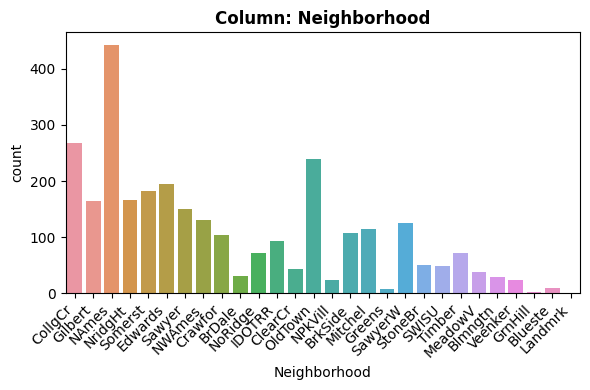

- NaN's Found: 0 (0.0%)
- Unique Values: 28
- Most common value: 'NAmes' occurs 443 times (15.12%)
- Not constant or quasi-constant.


In [165]:
explore_categorical(df, feature);

#### 3) Multivariate Viz


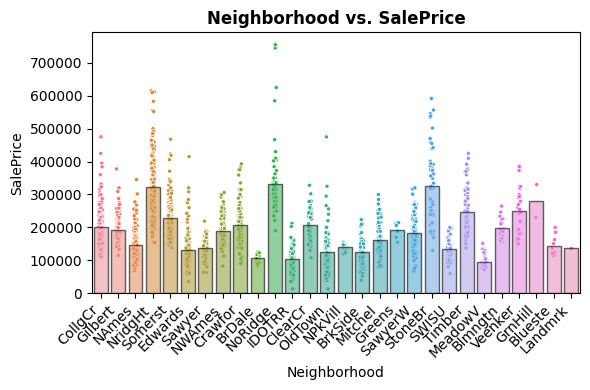

In [166]:
# Calling custom function
plot_categorical_vs_target(df, feature);